###Data Acquisition

This entails downloading the dataset from Kaggle. Initializing the Kaggle API to create a connection to Google colab. Then, we initialize the dataset's API to perform a download.

In [ ]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d sovitrath/diabetic-retinopathy-224x224-2019-data

 97% 231M/238M [00:03<00:00, 77.3MB/s]
100% 238M/238M [00:04<00:00, 62.3MB/s]


In [ ]:
! unzip diabetic-retinopathy-224x224-2019-data.zip

###Data Preprocessing

In this section, the dataset was split into train, test and validation tests. The dataset was split into the ratio of 7:2:1 respectively through the use of a helper function.

In [ ]:
#Load libraries
import tensorflow as tf
import os

import pandas as pd
import numpy as np
import shutil
import pathlib
import random
import matplotlib.pyplot as plt

In [ ]:
# Import helper functions
def split_dir_to_train_test_val(directory = "Dataset/",
                            train_size = 0.7,
                            test_size = 0.2,
                            val_size = 0.1):

  # Set random seed
  rng = random.Random(42)

  for root, folders, files in os.walk(directory):
    for folder in folders:
      # Create list of the files
      list_of_files = []
      for file_name in os.listdir(root+folder+"/"):
        list_of_files.append(file_name)

      #  Shuffle the list
      rng.shuffle(list_of_files)

      # Create lists of files
      train_files = list_of_files[:int(len(list_of_files)*train_size)]
      test_files = list_of_files[int(len(list_of_files)*train_size) : int(len(list_of_files)*(train_size+test_size))]
      val_files = list_of_files[int(len(list_of_files)*(train_size+test_size)):]

      # Create folders and files for train data
      for one_file in train_files:

        # Copy  files
        dest_dir = "files/train/"+folder+"/"
        os.makedirs(dest_dir, exist_ok=True)

        shutil.copy2(src=(root+folder+"/"+one_file),
                    dst=(dest_dir+one_file))
      print(f"Folder {folder}. Train data copied. {len(train_files)} files")

      # Create folders and files for test data
      for one_file in test_files:
        # Copy  files
        dest_dir = "files/test/"+folder+"/"
        os.makedirs(dest_dir, exist_ok=True)

        shutil.copy2(src=(root+folder+"/"+one_file),
                    dst=(dest_dir+one_file))
      print(f"Folder {folder}. Test data copied. {len(test_files)} files")

      # Create folders and files for validation data
      for one_file in val_files:

        # Copy  files
        dest_dir = "files/val/"+folder+"/"
        os.makedirs(dest_dir, exist_ok=True)

        shutil.copy2(src=(root+folder+"/"+one_file),
                    dst=(dest_dir+one_file))
      print(f"Folder {folder}. Validation data copied. {len(val_files)} files")




def get_class_names_from_folder(directory):
  data_dir = pathlib.Path(directory)
  class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class names
  return class_names
  print(class_names)


In [ ]:
#Split the data into train, test and validation
split_dir_to_train_test_val(directory = "Dataset/",
                            train_size = 0.7,
                            test_size = 0.2,
                            val_size = 0.1)

Folder Proliferate_DR. Train data copied. 206 files
Folder Proliferate_DR. Test data copied. 59 files
Folder Proliferate_DR. Validation data copied. 30 files
Folder Moderate. Train data copied. 699 files
Folder Moderate. Test data copied. 200 files
Folder Moderate. Validation data copied. 100 files
Folder Mild. Train data copied. 259 files
Folder Mild. Test data copied. 73 files
Folder Mild. Validation data copied. 38 files
Folder Severe. Train data copied. 135 files
Folder Severe. Test data copied. 38 files
Folder Severe. Validation data copied. 20 files
Folder No_DR. Train data copied. 1263 files
Folder No_DR. Test data copied. 361 files
Folder No_DR. Validation data copied. 181 files


###Model Training

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 695.2/695.2 kB 10.1 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO

In [ ]:
#Load pretrained model
model = YOLO("yolov8n-cls.pt")

100%|██████████| 5.28M/5.28M [00:00<00:00, 98.3MB/s]


###YOLOv8 Model Training

In [ ]:
model1 = YOLO("yolov8m-cls.pt")

100%|██████████| 32.7M/32.7M [00:00<00:00, 232MB/s]


In [ ]:
results = model1.train(data='/content/files', epochs=200, imgsz= 224)

Ultralytics YOLOv8.0.236 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolov8m-cls.pt, data=/content/files, epochs=200, time=None, patience=50, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxe

train: Scanning /content/files/train... 2562 images, 0 corrupt: 100%|██████████| 2562/2562 [00:00<?, ?it/s]
val: Scanning /content/files/val... 369 images, 0 corrupt: 100%|██████████| 369/369 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 38 weight(decay=0.0), 39 weight(decay=0.0005), 39 bias(decay=0.0)
200 epochs...

      Epoch    GPU_mem       loss  Instances       Size


      1/200      1.37G     0.4866          2        224: 100%|██████████| 161/161 [00:32<00:00,  4.90it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:01<00:00,  9.30it/s]

                   all      0.832          1



      Epoch    GPU_mem       loss  Instances       Size


      2/200      1.38G     0.5084          2        224: 100%|██████████| 161/161 [00:20<00:00,  7.85it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 14.17it/s]

                   all      0.802          1



      Epoch    GPU_mem       loss  Instances       Size


      3/200      1.37G     0.5267          2        224: 100%|██████████| 161/161 [00:22<00:00,  7.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 12.80it/s]

                   all       0.81          1



      Epoch    GPU_mem       loss  Instances       Size


      4/200      1.37G     0.5293          2        224: 100%|██████████| 161/161 [00:20<00:00,  7.77it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 13.94it/s]

                   all      0.786          1



      Epoch    GPU_mem       loss  Instances       Size


      5/200      1.37G      0.546          2        224: 100%|██████████| 161/161 [00:21<00:00,  7.40it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:01<00:00,  7.92it/s]

                   all      0.821          1



      Epoch    GPU_mem       loss  Instances       Size


      6/200      1.38G     0.5195          2        224: 100%|██████████| 161/161 [00:22<00:00,  7.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 12.25it/s]

                   all      0.848          1



      Epoch    GPU_mem       loss  Instances       Size


      7/200      1.37G       0.49          2        224: 100%|██████████| 161/161 [00:20<00:00,  7.81it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:01<00:00,  8.31it/s]

                   all      0.832          1



      Epoch    GPU_mem       loss  Instances       Size


      8/200      1.36G     0.4945          2        224: 100%|██████████| 161/161 [00:21<00:00,  7.35it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 13.92it/s]

                   all      0.821          1



      Epoch    GPU_mem       loss  Instances       Size


      9/200      1.37G     0.4665          2        224: 100%|██████████| 161/161 [00:20<00:00,  7.84it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 12.53it/s]

                   all      0.813          1



      Epoch    GPU_mem       loss  Instances       Size


     10/200      1.38G     0.4413          2        224: 100%|██████████| 161/161 [00:21<00:00,  7.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:01<00:00,  8.11it/s]

                   all      0.789          1



      Epoch    GPU_mem       loss  Instances       Size


     11/200      1.38G     0.4844          2        224: 100%|██████████| 161/161 [00:20<00:00,  7.74it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 13.63it/s]

                   all      0.816          1



      Epoch    GPU_mem       loss  Instances       Size


     12/200      1.36G     0.4941          2        224: 100%|██████████| 161/161 [00:20<00:00,  7.84it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 14.01it/s]

                   all      0.829          1



      Epoch    GPU_mem       loss  Instances       Size


     13/200      1.37G     0.5008          2        224: 100%|██████████| 161/161 [00:22<00:00,  7.06it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:01<00:00, 10.85it/s]

                   all      0.799          1



      Epoch    GPU_mem       loss  Instances       Size


     14/200      1.37G     0.4716          2        224: 100%|██████████| 161/161 [00:20<00:00,  7.81it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 13.95it/s]

                   all      0.821          1



      Epoch    GPU_mem       loss  Instances       Size


     15/200      1.37G     0.4625          2        224: 100%|██████████| 161/161 [00:20<00:00,  7.72it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:01<00:00,  8.08it/s]

                   all      0.832          1



      Epoch    GPU_mem       loss  Instances       Size


     16/200      1.37G     0.4685          2        224: 100%|██████████| 161/161 [00:22<00:00,  7.17it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 12.88it/s]

                   all      0.799          1



      Epoch    GPU_mem       loss  Instances       Size


     17/200      1.37G     0.4695          2        224: 100%|██████████| 161/161 [00:21<00:00,  7.67it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 13.80it/s]

                   all      0.829          1



      Epoch    GPU_mem       loss  Instances       Size


     18/200      1.37G     0.4407          2        224: 100%|██████████| 161/161 [00:22<00:00,  7.27it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:01<00:00,  7.81it/s]

                   all      0.813          1



      Epoch    GPU_mem       loss  Instances       Size


     19/200      1.37G     0.4432          2        224: 100%|██████████| 161/161 [00:20<00:00,  7.72it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 14.57it/s]

                   all      0.818          1



      Epoch    GPU_mem       loss  Instances       Size


     20/200      1.36G     0.4262          2        224: 100%|██████████| 161/161 [00:20<00:00,  7.71it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 14.81it/s]

                   all      0.832          1



      Epoch    GPU_mem       loss  Instances       Size


     21/200      1.38G     0.4361          2        224: 100%|██████████| 161/161 [00:23<00:00,  6.88it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:01<00:00, 11.09it/s]

                   all      0.824          1



      Epoch    GPU_mem       loss  Instances       Size


     22/200      1.37G     0.4303          2        224: 100%|██████████| 161/161 [00:20<00:00,  7.72it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 13.50it/s]

                   all      0.829          1



      Epoch    GPU_mem       loss  Instances       Size


     23/200      1.37G     0.4157          2        224: 100%|██████████| 161/161 [00:21<00:00,  7.61it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:01<00:00,  8.02it/s]

                   all      0.832          1



      Epoch    GPU_mem       loss  Instances       Size


     24/200      1.35G     0.4273          2        224: 100%|██████████| 161/161 [00:22<00:00,  7.28it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 13.12it/s]

                   all      0.824          1



      Epoch    GPU_mem       loss  Instances       Size


     25/200      1.37G      0.441          2        224: 100%|██████████| 161/161 [00:20<00:00,  7.78it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 13.42it/s]

                   all      0.848          1



      Epoch    GPU_mem       loss  Instances       Size


     26/200      1.37G     0.4011          2        224: 100%|██████████| 161/161 [00:22<00:00,  7.06it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 12.77it/s]

                   all      0.835          1



      Epoch    GPU_mem       loss  Instances       Size


     27/200      1.36G     0.3991          2        224: 100%|██████████| 161/161 [00:20<00:00,  7.71it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 13.31it/s]

                   all       0.81          1



      Epoch    GPU_mem       loss  Instances       Size


     28/200      1.38G     0.3886          2        224: 100%|██████████| 161/161 [00:21<00:00,  7.40it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:01<00:00,  8.07it/s]

                   all      0.805          1



      Epoch    GPU_mem       loss  Instances       Size


     29/200      1.37G     0.3744          2        224: 100%|██████████| 161/161 [00:21<00:00,  7.51it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 13.56it/s]

                   all      0.829          1



      Epoch    GPU_mem       loss  Instances       Size


     30/200      1.37G     0.3686          2        224: 100%|██████████| 161/161 [00:20<00:00,  7.67it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:01<00:00, 11.15it/s]

                   all      0.818          1



      Epoch    GPU_mem       loss  Instances       Size


     31/200      1.36G     0.3941          2        224: 100%|██████████| 161/161 [00:23<00:00,  6.96it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 13.08it/s]

                   all      0.824          1



      Epoch    GPU_mem       loss  Instances       Size


     32/200      1.36G     0.3923          2        224: 100%|██████████| 161/161 [00:21<00:00,  7.53it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 13.68it/s]

                   all      0.846          1



      Epoch    GPU_mem       loss  Instances       Size


     33/200      1.37G     0.3688          2        224: 100%|██████████| 161/161 [00:23<00:00,  6.98it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:01<00:00,  7.13it/s]

                   all      0.821          1



      Epoch    GPU_mem       loss  Instances       Size


     34/200      1.37G      0.377          2        224: 100%|██████████| 161/161 [00:20<00:00,  7.69it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 13.52it/s]

                   all      0.851          1



      Epoch    GPU_mem       loss  Instances       Size


     35/200      1.37G     0.3529          2        224: 100%|██████████| 161/161 [00:21<00:00,  7.45it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:01<00:00,  7.31it/s]

                   all      0.829          1



      Epoch    GPU_mem       loss  Instances       Size


     36/200      1.35G     0.3649          2        224: 100%|██████████| 161/161 [00:22<00:00,  7.28it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 12.18it/s]

                   all      0.846          1



      Epoch    GPU_mem       loss  Instances       Size


     37/200      1.37G     0.3679          2        224: 100%|██████████| 161/161 [00:20<00:00,  7.70it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 13.64it/s]

                   all       0.84          1



      Epoch    GPU_mem       loss  Instances       Size


     38/200      1.37G     0.3468          2        224: 100%|██████████| 161/161 [00:23<00:00,  6.88it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:01<00:00,  8.18it/s]

                   all      0.827          1



      Epoch    GPU_mem       loss  Instances       Size


     39/200      1.36G     0.3404          2        224: 100%|██████████| 161/161 [00:20<00:00,  7.71it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 12.19it/s]

                   all      0.813          1



      Epoch    GPU_mem       loss  Instances       Size


     40/200      1.38G      0.339          2        224: 100%|██████████| 161/161 [00:20<00:00,  7.70it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:01<00:00,  6.65it/s]

                   all      0.859          1



      Epoch    GPU_mem       loss  Instances       Size


     41/200      1.37G     0.3495          2        224: 100%|██████████| 161/161 [00:22<00:00,  7.31it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 13.84it/s]

                   all      0.816          1



      Epoch    GPU_mem       loss  Instances       Size


     42/200      1.38G     0.3298          2        224: 100%|██████████| 161/161 [00:21<00:00,  7.63it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 12.22it/s]

                   all      0.846          1



      Epoch    GPU_mem       loss  Instances       Size


     43/200      1.39G     0.3227          2        224: 100%|██████████| 161/161 [00:23<00:00,  6.82it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 13.10it/s]

                   all      0.835          1



      Epoch    GPU_mem       loss  Instances       Size


     44/200      1.36G     0.3218          2        224: 100%|██████████| 161/161 [00:22<00:00,  7.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 13.12it/s]

                   all      0.851          1



      Epoch    GPU_mem       loss  Instances       Size


     45/200      1.37G     0.3217          2        224: 100%|██████████| 161/161 [00:22<00:00,  7.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:01<00:00,  7.38it/s]

                   all      0.808          1



      Epoch    GPU_mem       loss  Instances       Size


     46/200      1.38G     0.3206          2        224: 100%|██████████| 161/161 [00:21<00:00,  7.61it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 14.59it/s]

                   all      0.827          1



      Epoch    GPU_mem       loss  Instances       Size


     47/200      1.38G     0.2933          2        224: 100%|██████████| 161/161 [00:21<00:00,  7.58it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:01<00:00, 11.47it/s]

                   all      0.818          1



      Epoch    GPU_mem       loss  Instances       Size


     48/200      1.36G     0.3084          2        224: 100%|██████████| 161/161 [00:23<00:00,  7.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 12.36it/s]

                   all      0.829          1



      Epoch    GPU_mem       loss  Instances       Size


     49/200      1.38G     0.2877          2        224: 100%|██████████| 161/161 [00:20<00:00,  7.76it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 14.27it/s]

                   all      0.827          1



      Epoch    GPU_mem       loss  Instances       Size


     50/200      1.37G     0.3181          2        224: 100%|██████████| 161/161 [00:21<00:00,  7.51it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:01<00:00,  7.09it/s]

                   all      0.832          1



      Epoch    GPU_mem       loss  Instances       Size


     51/200      1.37G     0.2942          2        224: 100%|██████████| 161/161 [00:21<00:00,  7.42it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 12.63it/s]

                   all      0.829          1



      Epoch    GPU_mem       loss  Instances       Size


     52/200      1.35G     0.2768          2        224: 100%|██████████| 161/161 [00:20<00:00,  7.70it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 14.10it/s]

                   all       0.84          1



      Epoch    GPU_mem       loss  Instances       Size


     53/200      1.37G     0.2958          2        224: 100%|██████████| 161/161 [00:23<00:00,  6.84it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:01<00:00,  9.61it/s]

                   all      0.816          1



      Epoch    GPU_mem       loss  Instances       Size


     54/200      1.37G     0.2864          2        224: 100%|██████████| 161/161 [00:21<00:00,  7.67it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 12.55it/s]

                   all      0.827          1



      Epoch    GPU_mem       loss  Instances       Size


     55/200      1.36G     0.2638          2        224: 100%|██████████| 161/161 [00:21<00:00,  7.40it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:01<00:00,  9.06it/s]

                   all      0.797          1



      Epoch    GPU_mem       loss  Instances       Size


     56/200      1.38G     0.2865          2        224: 100%|██████████| 161/161 [00:22<00:00,  7.32it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 13.42it/s]

                   all      0.837          1



      Epoch    GPU_mem       loss  Instances       Size


     57/200      1.37G     0.2781          2        224: 100%|██████████| 161/161 [00:21<00:00,  7.62it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 13.78it/s]

                   all      0.829          1



      Epoch    GPU_mem       loss  Instances       Size


     58/200      1.38G     0.2519          2        224: 100%|██████████| 161/161 [00:23<00:00,  6.89it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:01<00:00,  9.30it/s]

                   all      0.835          1



      Epoch    GPU_mem       loss  Instances       Size


     59/200      1.38G      0.261          2        224: 100%|██████████| 161/161 [00:20<00:00,  7.69it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 15.58it/s]

                   all      0.816          1



      Epoch    GPU_mem       loss  Instances       Size


     60/200      1.36G     0.2507          2        224: 100%|██████████| 161/161 [00:21<00:00,  7.57it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:01<00:00,  7.17it/s]

                   all      0.837          1



      Epoch    GPU_mem       loss  Instances       Size


     61/200      1.37G     0.2296          2        224: 100%|██████████| 161/161 [00:22<00:00,  7.25it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 12.78it/s]

                   all      0.832          1



      Epoch    GPU_mem       loss  Instances       Size


     62/200      1.38G     0.2367          2        224: 100%|██████████| 161/161 [00:21<00:00,  7.61it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 13.48it/s]

                   all      0.832          1



      Epoch    GPU_mem       loss  Instances       Size


     63/200      1.38G     0.2305          2        224: 100%|██████████| 161/161 [00:23<00:00,  6.96it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:01<00:00,  7.38it/s]

                   all       0.84          1



      Epoch    GPU_mem       loss  Instances       Size


     64/200      1.36G     0.2474          2        224: 100%|██████████| 161/161 [00:20<00:00,  7.74it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 14.78it/s]

                   all      0.846          1



      Epoch    GPU_mem       loss  Instances       Size


     65/200      1.38G     0.1984          2        224: 100%|██████████| 161/161 [00:21<00:00,  7.51it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:01<00:00,  8.23it/s]

                   all      0.821          1



      Epoch    GPU_mem       loss  Instances       Size


     66/200      1.37G     0.2291          2        224: 100%|██████████| 161/161 [00:22<00:00,  7.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 12.29it/s]

                   all      0.832          1



      Epoch    GPU_mem       loss  Instances       Size


     67/200      1.37G     0.2493          2        224: 100%|██████████| 161/161 [00:21<00:00,  7.59it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 14.68it/s]

                   all      0.837          1



      Epoch    GPU_mem       loss  Instances       Size


     68/200      1.35G      0.202          2        224: 100%|██████████| 161/161 [00:24<00:00,  6.69it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:01<00:00, 10.11it/s]

                   all      0.835          1



      Epoch    GPU_mem       loss  Instances       Size


     69/200      1.37G      0.209          2        224: 100%|██████████| 161/161 [00:21<00:00,  7.61it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 13.02it/s]

                   all      0.832          1



      Epoch    GPU_mem       loss  Instances       Size


     70/200      1.37G     0.2075          2        224: 100%|██████████| 161/161 [00:22<00:00,  7.27it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:01<00:00,  7.05it/s]

                   all      0.837          1



      Epoch    GPU_mem       loss  Instances       Size


     71/200      1.36G     0.1953          2        224: 100%|██████████| 161/161 [00:21<00:00,  7.37it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 13.64it/s]

                   all      0.827          1



      Epoch    GPU_mem       loss  Instances       Size


     72/200      1.38G     0.2081          2        224: 100%|██████████| 161/161 [00:21<00:00,  7.54it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:01<00:00, 11.21it/s]

                   all      0.818          1



      Epoch    GPU_mem       loss  Instances       Size


     73/200      1.37G     0.1915          2        224: 100%|██████████| 161/161 [00:23<00:00,  6.94it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 13.75it/s]

                   all      0.837          1



      Epoch    GPU_mem       loss  Instances       Size


     74/200      1.37G     0.1909          2        224: 100%|██████████| 161/161 [00:21<00:00,  7.58it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 13.40it/s]

                   all      0.835          1



      Epoch    GPU_mem       loss  Instances       Size


     75/200      1.36G     0.1862          2        224: 100%|██████████| 161/161 [00:22<00:00,  7.06it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:01<00:00,  7.00it/s]

                   all      0.835          1



      Epoch    GPU_mem       loss  Instances       Size


     76/200      1.36G     0.2081          2        224: 100%|██████████| 161/161 [00:21<00:00,  7.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 12.81it/s]

                   all      0.824          1



      Epoch    GPU_mem       loss  Instances       Size


     77/200      1.37G     0.1901          2        224: 100%|██████████| 161/161 [00:21<00:00,  7.52it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:01<00:00,  8.65it/s]

                   all      0.835          1



      Epoch    GPU_mem       loss  Instances       Size


     78/200      1.37G     0.1928          2        224: 100%|██████████| 161/161 [00:22<00:00,  7.02it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:01<00:00, 11.38it/s]

                   all      0.846          1



      Epoch    GPU_mem       loss  Instances       Size


     79/200      1.37G     0.1862          2        224: 100%|██████████| 161/161 [00:21<00:00,  7.58it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 14.33it/s]

                   all      0.827          1



      Epoch    GPU_mem       loss  Instances       Size


     80/200      1.35G     0.1652          2        224: 100%|██████████| 161/161 [00:22<00:00,  7.25it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:01<00:00,  8.18it/s]

                   all      0.851          1



      Epoch    GPU_mem       loss  Instances       Size


     81/200      1.37G     0.1625          2        224: 100%|██████████| 161/161 [00:20<00:00,  7.78it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 12.63it/s]

                   all      0.846          1



      Epoch    GPU_mem       loss  Instances       Size


     82/200      1.37G     0.1455          2        224: 100%|██████████| 161/161 [00:20<00:00,  7.71it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:01<00:00, 10.43it/s]

                   all      0.821          1



      Epoch    GPU_mem       loss  Instances       Size


     83/200      1.36G     0.1966          2        224: 100%|██████████| 161/161 [00:22<00:00,  7.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 14.80it/s]


                   all      0.846          1

      Epoch    GPU_mem       loss  Instances       Size


     84/200      1.38G     0.1541          2        224: 100%|██████████| 161/161 [00:21<00:00,  7.66it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 13.29it/s]

                   all      0.832          1



      Epoch    GPU_mem       loss  Instances       Size


     85/200      1.37G     0.1406          2        224: 100%|██████████| 161/161 [00:22<00:00,  7.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:01<00:00,  8.00it/s]

                   all      0.835          1



      Epoch    GPU_mem       loss  Instances       Size


     86/200      1.38G      0.174          2        224: 100%|██████████| 161/161 [00:21<00:00,  7.57it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 13.28it/s]

                   all      0.846          1



      Epoch    GPU_mem       loss  Instances       Size


     87/200      1.38G     0.1524          2        224: 100%|██████████| 161/161 [00:21<00:00,  7.59it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:01<00:00, 11.25it/s]

                   all      0.848          1



      Epoch    GPU_mem       loss  Instances       Size


     88/200      1.36G     0.1864          2        224: 100%|██████████| 161/161 [00:23<00:00,  6.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 14.79it/s]

                   all      0.824          1



      Epoch    GPU_mem       loss  Instances       Size


     89/200      1.37G     0.1436          2        224: 100%|██████████| 161/161 [00:21<00:00,  7.57it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:00<00:00, 13.65it/s]

                   all      0.835          1



      Epoch    GPU_mem       loss  Instances       Size


     90/200      1.38G     0.1438          2        224: 100%|██████████| 161/161 [00:21<00:00,  7.35it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:01<00:00,  6.86it/s]

                   all      0.832          1
Stopping training early as no improvement observed in last 50 epochs. Best results observed at epoch 40, best model saved as best.pt.
To update EarlyStopping(patience=50) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



90 epochs completed in 0.601 hours.
Optimizer stripped from runs/classify/train2/weights/last.pt, 31.7MB
Optimizer stripped from runs/classify/train2/weights/best.pt, 31.7MB

Validating runs/classify/train2/weights/best.pt...
Ultralytics YOLOv8.0.236 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m-cls summary (fused): 103 layers, 15769061 parameters, 0 gradients, 41.6 GFLOPs
train: /content/files/train... found 2562 images in 5 classes ✅ 
val: /content/files/val... found 369 images in 5 classes ✅ 
test: /content/files/test... found 731 images in 5 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 12/12 [00:01<00:00,  8.29it/s]


                   all      0.859          1
Speed: 0.4ms preprocess, 2.4ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train2
Results saved to runs/classify/train2


In [ ]:
!scp -r /content/runs '/content/drive/MyDrive/DRDetection'

Model Evaluation

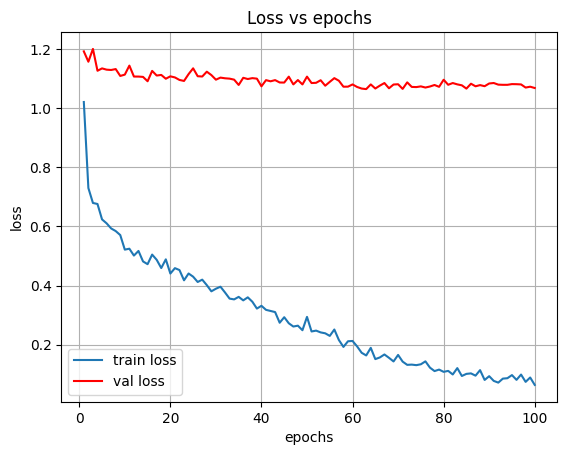

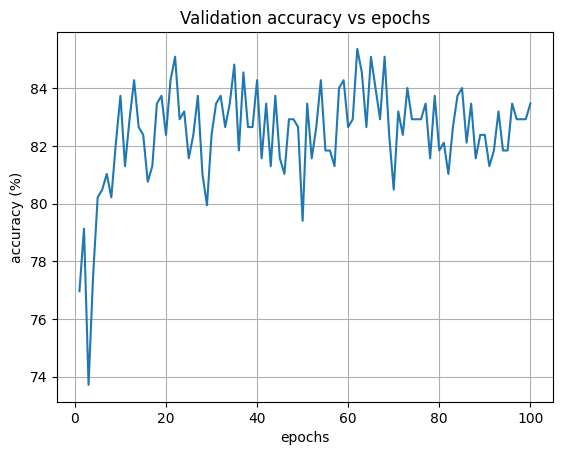

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt


results_path = './runs/classify/train3/results.csv'

results = pd.read_csv(results_path)

plt.figure()
plt.plot(results['                  epoch'], results['             train/loss'], label='train loss')
plt.plot(results['                  epoch'], results['               val/loss'], label='val loss', c='red')
plt.grid()
plt.title('Loss vs epochs')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()


plt.figure()
plt.plot(results['                  epoch'], results['  metrics/accuracy_top1'] * 100)
plt.grid()
plt.title('Validation accuracy vs epochs')
plt.ylabel('accuracy (%)')
plt.xlabel('epochs')

plt.show()

###Model Prediction

In [ ]:
model7 = YOLO('/content/drive/MyDrive/DRDetection/runs/classify/train3/weights/best.pt')  # load custom model

results = model7('/content/Dataset/Moderate/7550966ef777.png')  # predict image

names_dict = results[0].names

probs = results[0].probs.data.tolist()

print(names_dict)
print(probs)

print(names_dict[np.argmax(probs)])


image 1/1 /content/Dataset/Moderate/7550966ef777.png: 224x224 Moderate 0.98, Severe 0.02, Proliferate_DR 0.00, Mild 0.00, No_DR 0.00, 7.5ms
Speed: 55.3ms preprocess, 7.5ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
{0: 'Mild', 1: 'Moderate', 2: 'No_DR', 3: 'Proliferate_DR', 4: 'Severe'}
[0.00032105459831655025, 0.9779778718948364, 3.6577915807356476e-08, 0.000713494373485446, 0.02098752185702324]
Moderate
